In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm

In [2]:
df=pd.read_csv('C:\\Users\\LENOVO\\Downloads\\forestfires.csv')

In [3]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.drop(['month','day'],axis=1,inplace=True)

In [5]:
predictors = df.iloc[:,0:28]
target = df.iloc[:,28]

<AxesSubplot:>

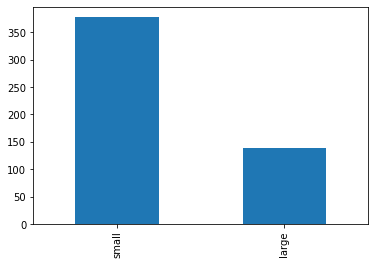

In [6]:
df.size_category.value_counts().plot(kind="bar")

In [7]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
fires = norm_func(predictors)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25, stratify = target)

In [11]:
#linear
model_linear = SVC(kernel = "linear")

In [12]:
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)

In [13]:
np.mean(pred_test_linear==y_test)

0.9846153846153847

In [14]:
#poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [15]:
np.mean(pred_test_poly==y_test)

0.7692307692307693

In [16]:
#rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [17]:
np.mean(pred_test_rbf==y_test)

0.7461538461538462

In [18]:
#sigmoid
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

np.mean(pred_test_sig==y_test)

0.7461538461538462